In [ ]:
import pandas as pd
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Load the CSV file using pandas
df = pd.read_csv('/content/drive/MyDrive/btp/Datasets_input/kotak.csv')

# Convert the 'date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])
print(df)
# Reorder the columns with 'Close' at the end
cols = df.columns.tolist()
cols.remove('Close')
cols.append('Close')
df = df[cols]

df.reset_index(drop=True, inplace=True)
df.fillna(df.mean(), inplace=True)


# Set the 'date' column as the index
df.set_index('Date', inplace=True)
# print(df.isnull().sum())



# print(df)
# Split the data into training, validation, and testing sets
train_data = df['2000':'2016']
val_data = df['2017':'2018']
test_data = df['2019':]

test_data_original=test_data

# print(train_data)
# Normalize the data
train_mean_original = train_data.mean()
train_std_original = train_data.std()

val_mean_original=val_data.mean()
val_std_original=val_data.std()

test_mean_original=test_data.mean()
test_std_original=test_data.std()

train_data = (train_data - train_mean_original) / train_std_original
val_data=(val_data - val_mean_original) / val_std_original
test_data=(test_data - test_mean_original) / test_std_original
# print(train_data)
# val_data = (val_data - train_mean_original) / train_std_original
# test_data = (test_data - train_mean_original) / train_std_original
# print(test_data_original)
# print(test_data)





           Date         Open         High          Low        Close  \
0    2001-07-02     2.402500     2.475000     2.400000     2.402500   
1    2001-07-03     2.475000     2.475000     2.375000     2.400000   
2    2001-07-04     2.425000     2.450000     2.387500     2.420000   
3    2001-07-05     2.450000     2.472500     2.400000     2.415000   
4    2001-07-06     2.425000     2.425000     2.350000     2.400000   
...         ...          ...          ...          ...          ...   
5434 2023-04-17  1888.949951  1913.800049  1826.099976  1895.150024   
5435 2023-04-18  1900.949951  1904.599976  1885.900024  1888.300049   
5436 2023-04-19  1888.300049  1888.349976  1876.150024  1884.900024   
5437 2023-04-20  1884.300049  1903.400024  1872.050049  1884.000000   
5438 2023-04-21  1882.000000  1903.650024  1877.150024  1893.650024   

        Adj Close      Volume  
0        2.225060    110800.0  
1        2.222745     77520.0  
2        2.241267     49360.0  
3        2.236637  

<ipython-input-221-5293a56c7157>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)


In [ ]:
class StockPriceDataset(Dataset):
    def __init__(self, data, seq_len):
        self.data = data
        self.seq_len = seq_len
    
    def __getitem__(self, index):
        # Get a sequence of 7 consecutive rows starting from the index
        seq = self.data[index:index+self.seq_len]
        
        # Convert the sequence to a PyTorch tensor
        seq_tensor = torch.tensor(seq.values, dtype=torch.float)
        
        # Return the tensor
        return seq_tensor
    
    def __len__(self):
        return len(self.data) - self.seq_len + 1

In [ ]:
# class StockPriceDataset(Dataset):
#     def __init__(self, data, seq_len):
#         self.data = data
#         self.seq_len = seq_len
    
#     def __getitem__(self, index):
#       # Get a sequence of 7 consecutive rows starting from the index
#       seq = self.data[index:index+self.seq_len]
    
#       # Extract the closing prices from the 4th column
#       closing_prices = seq.iloc[:, 3].values
    
#       # Convert the closing prices to a PyTorch tensor
#       closing_prices_tensor = torch.tensor(closing_prices, dtype=torch.float)
    
#       # Return the tensor
#       return closing_prices_tensor

    
#     def __len__(self):
#         return len(self.data) - self.seq_len + 1

In [ ]:
seq_len = 7
train_dataset = StockPriceDataset(train_data, seq_len=seq_len)
val_dataset = StockPriceDataset(val_data, seq_len=seq_len)
test_dataset = StockPriceDataset(test_data, seq_len=seq_len)
# test_dataset_original=StockPriceDataset(test_data_original,seq_len=seq_len)

batch_size=64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
# Original

# import torch.nn as nn

# class StockPriceModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, kernel_size):
#         super(StockPriceModel, self).__init__()
        
#         # Define the CNN layer
#         self.cnn = nn.Conv1d(7, 32, kernel_size=kernel_size, padding=kernel_size//2)
        
#         # Define the BiLSTM layer
#         self.bilstm = nn.LSTM(input_size=32, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        
#         # Define the output layer
#         self.fc = nn.Linear(hidden_size*2, 1)
    
#     def forward(self, x):
#         # Apply the CNN layer
# #         x = x.unsqueeze(1)
#         print("Input Shape",x.shape)
#         x = self.cnn(x)
#         print("CNN shape",x.shape)
#         x = nn.functional.relu(x)
    
#     # Reshape the output of the CNN layer
#         batch_size, p, seq_len = x.shape
#         x = x.permute(0, 2, 1)
#         x = x.reshape(batch_size, seq_len, -1)
#         print("shape of output of cnn layer is",x.shape)
    
#     # Apply the BiLSTM layer
#         x, _ = self.bilstm(x)
#         print("BIlstm output shape",x.shape)
    
#     # Apply the output layer
#         x = self.fc(x[:, -1, :])
#         print("Final Output shape", x.shape)
    
#         return x



In [ ]:
# original 2 with changed sequence length

# import torch.nn as nn

# class StockPriceModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, kernel_size):
#         super(StockPriceModel, self).__init__()
        
#         # Define the CNN layer
#         self.cnn = nn.Conv1d(6, 32, kernel_size=kernel_size, padding=kernel_size//2)
        
#         # Define the BiLSTM layer
#         self.bilstm = nn.LSTM(input_size=32, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        
#         # Define the output layer
#         self.fc = nn.Linear(hidden_size*2, 1)
    
#     def forward(self, x):
#         # Apply the CNN layer
# #         x = x.unsqueeze(1)
#         print("Input Shape",x.shape)
#         x = x.permute(0, 2, 1)
#         print("shape after permutated",x.shape)
#         x = self.cnn(x)
#         print("CNN shape",x.shape)
#         x = nn.functional.relu(x)
    
#     # Reshape the output of the CNN layer
#         batch_size, p, seq_len = x.shape
#         print("Sequence length ",seq_len)
#         x = x.permute(0, 2, 1)
#         x = x.reshape(batch_size, seq_len, -1)
#         print("shape of output of cnn layer is",x.shape)
    
#     # Apply the BiLSTM layer
#         x, _ = self.bilstm(x)
#         print("BIlstm output shape",x.shape)
    
#     # Apply the output layer
#         x = self.fc(x[:, -1, :])
#         print("Final Output shape", x.shape)
    
#         return x


In [ ]:
# Original 3 with Added Dense and MaxPool Layer

# import torch.nn as nn

# class StockPriceModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, kernel_size):
#         super(StockPriceModel, self).__init__()
        
#         # Define the CNN layer
#         self.cnn = nn.Conv1d(6, 32, kernel_size=kernel_size, padding=kernel_size//2)
        
#         # Define the MaxPooling layer
#         self.pool = nn.MaxPool1d(kernel_size=2)
        
#         # Define the BiLSTM layer
#         self.bilstm = nn.LSTM(input_size=32, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        
#         # Define the Dense layer
#         self.dense = nn.Linear(hidden_size*2, 64)
        
#         # Define the output layer
#         self.fc = nn.Linear(64, 1)
    
#     def forward(self, x):
#         # Apply the CNN layer
# #         x = x.unsqueeze(1)
#         print("Input Shape",x.shape)
#         x = x.permute(0, 2, 1)
#         print("shape after permutated",x.shape)
#         x = self.cnn(x)
#         print("CNN shape",x.shape)
#         x = nn.functional.relu(x)
    
#         # Apply the MaxPooling layer
#         x = self.pool(x)
#         print("MaxPooling shape",x.shape)
    
#         # Reshape the output of the CNN layer
#         batch_size, p, seq_len = x.shape
#         print("Sequence length ",seq_len)
#         x = x.permute(0, 2, 1)
#         x = x.reshape(batch_size, seq_len, -1)
#         print("shape of output of cnn layer is",x.shape)
    
#         # Apply the BiLSTM layer
#         x, _ = self.bilstm(x)
#         print("BIlstm output shape",x.shape)
    
#         # Apply the Dense layer
#         x = self.dense(x[:, -1, :])
#         print("Dense output shape",x.shape)
        
#         # Apply the output layer
#         x = self.fc(x)
#         print("Final Output shape", x.shape)
    
#         return x


In [ ]:
# original 4 taking all features into model

# import torch.nn as nn

# class StockPriceModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, kernel_size):
#         super(StockPriceModel, self).__init__()
        
#         # Define the CNN layer
#         self.cnn = nn.Conv1d(6, 32, kernel_size=1, padding=0)
        
#         # Define the activation function for CNN layer
#         self.cnn_activation = nn.Sigmoid()
        
#         # Define the MaxPooling layer
#         self.pool = nn.MaxPool1d(kernel_size=1, padding=0)
        
#         # Define the BiLSTM layer
#         self.bilstm = nn.LSTM(input_size=32, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        
#         # Define the activation function for BiLSTM layer
#         self.bilstm_activation = nn.Tanh()
        
#         # Define the Dense layer
#         self.dense = nn.Linear(hidden_size*2, 1)
    
#     def forward(self, x):
#         # Apply the CNN layer
#         x = x.permute(0, 2, 1)
#         x = self.cnn(x)
#         x = self.cnn_activation(x)
    
#         # Apply the MaxPooling layer
#         x = self.pool(x)
    
#         # Reshape the output of the CNN layer
#         batch_size, p, seq_len = x.shape
#         x = x.permute(0, 2, 1)
#         x = x.reshape(batch_size, seq_len, -1)
    
#         # Apply the BiLSTM layer
#         x, _ = self.bilstm(x)
#         x = self.bilstm_activation(x)
    
#         # Apply the Dense layer
#         x = self.dense(x[:, -1, :])
#         print("Final Output shape", x.shape)
        
#         return x


In [ ]:
import torch.nn as nn

class StockPriceModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, kernel_size):
        super(StockPriceModel, self).__init__()
        
        # Define the CNN layer
        self.cnn = nn.Conv1d(6, 32, kernel_size=1, padding=0)
        
        # Define the activation function for CNN layer
        self.cnn_activation = nn.Sigmoid()
        
        # Define the MaxPooling layer
        self.pool = nn.MaxPool1d(kernel_size=1, padding=0)
        
        # Define the BiLSTM layer
        self.bilstm = nn.LSTM(input_size=32, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        
        # Define the activation function for BiLSTM layer
        self.bilstm_activation = nn.Tanh()
        
        # Define the Dense layer
        self.dense = nn.Linear(hidden_size*2, 1)
    
    def forward(self, x):
        # Apply the CNN layer
        print("inputshape to cnn:",x.shape)
        x = x.permute(0, 2, 1)
  
        
        x = self.cnn(x)
        x = self.cnn_activation(x)
    
        # Apply the MaxPooling layer
        print("input shape for pooling layer",x.shape)
        x = self.pool(x)
    
        # Reshape the output of the CNN layer
        batch_size, p, seq_len = x.shape
        x = x.permute(0, 2, 1)
        x = x.reshape(batch_size, seq_len, -1)
        print("output shape of cnn layer",x.shape)
    
        # Apply the BiLSTM layer
        x, _ = self.bilstm(x)
        x = self.bilstm_activation(x)
        print("output shape of bilstm",x.shape)
    
        # Apply the Dense layer
        x = self.dense(x[:, -1, :])
        print("Final shape after Dense Layer",x.shape)
        
        return x

In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = StockPriceModel(input_size=6, hidden_size=128, num_layers=2, kernel_size=5).to(device)
criterion = nn.L1Loss() #mean absolute error
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_losses=[]
val_losses=[]


num_epochs = 50
for epoch in range(num_epochs):
    train_loss = 0.0
    for batch in train_loader:
        # Move the batch to the GPU
        batch = batch.to(device)
        outputs = model(batch)
        targets = batch[:, -1, -1].unsqueeze(1)
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * batch.shape[0]
    
    # Evaluate the model on the validation set
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_loader:
            # Move the batch to the GPU
            batch = batch.to(device)
            
            # Forward pass
            # print(batch.shape)
            outputs = model(batch)
            targets = batch[:, -1, -1].unsqueeze(1)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * batch.shape[0]
    
    train_loss /= len(train_data)
    val_loss /= len(val_data)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')



Streaming output truncated to the last 5000 lines.
Final shape after Dense Layer torch.Size([64, 1])
inputshape to cnn: torch.Size([64, 7, 6])
input shape after permutation torch.Size([64, 6, 7])
input shape for pooling layer torch.Size([64, 32, 7])
output shape of cnn layer torch.Size([64, 7, 32])
output shape of bilstm torch.Size([64, 7, 256])
Final shape after Dense Layer torch.Size([64, 1])
inputshape to cnn: torch.Size([64, 7, 6])
input shape after permutation torch.Size([64, 6, 7])
input shape for pooling layer torch.Size([64, 32, 7])
output shape of cnn layer torch.Size([64, 7, 32])
output shape of bilstm torch.Size([64, 7, 256])
Final shape after Dense Layer torch.Size([64, 1])
inputshape to cnn: torch.Size([40, 7, 6])
input shape after permutation torch.Size([40, 6, 7])
input shape for pooling layer torch.Size([40, 32, 7])
output shape of cnn layer torch.Size([40, 7, 32])
output shape of bilstm torch.Size([40, 7, 256])
Final shape after Dense Layer torch.Size([40, 1])
Epoch 38

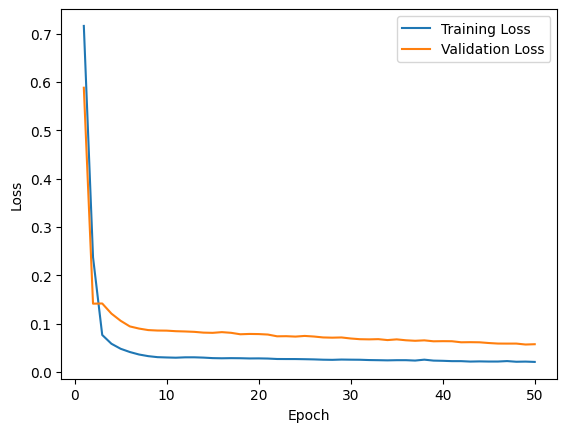

In [ ]:
plt.plot(range(1,num_epochs+1),train_losses,label='Training Loss')
plt.plot(range(1,num_epochs+1),val_losses,label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss = 0
predictions = []
with torch.no_grad():
    model.eval()
    for batch in test_loader:
        # Move the batch to the device
        batch = batch.to(device)
       
        # Forward pass
        output = model(batch)
        
        # Calculate the loss
        loss = criterion(output.squeeze(), batch[:, -1, 5])
        test_loss += loss.item() * batch.shape[0]
        # Add the predictions to the list
        predictions += output.squeeze().detach().cpu().numpy().tolist()
        # actual_predictions = [x + (last_observed_price.item()*test_std_original['Close'])+test_mean_original['Close'] for x in predictions]

test_loss /= len(test_data)
print('Test Loss:', test_loss)


inputshape to cnn: torch.Size([64, 7, 6])
input shape after permutation torch.Size([64, 6, 7])
input shape for pooling layer torch.Size([64, 32, 7])
output shape of cnn layer torch.Size([64, 7, 32])
output shape of bilstm torch.Size([64, 7, 256])
Final shape after Dense Layer torch.Size([64, 1])
inputshape to cnn: torch.Size([64, 7, 6])
input shape after permutation torch.Size([64, 6, 7])
input shape for pooling layer torch.Size([64, 32, 7])
output shape of cnn layer torch.Size([64, 7, 32])
output shape of bilstm torch.Size([64, 7, 256])
Final shape after Dense Layer torch.Size([64, 1])
inputshape to cnn: torch.Size([64, 7, 6])
input shape after permutation torch.Size([64, 6, 7])
input shape for pooling layer torch.Size([64, 32, 7])
output shape of cnn layer torch.Size([64, 7, 32])
output shape of bilstm torch.Size([64, 7, 256])
Final shape after Dense Layer torch.Size([64, 1])
inputshape to cnn: torch.Size([64, 7, 6])
input shape after permutation torch.Size([64, 6, 7])
input shape fo

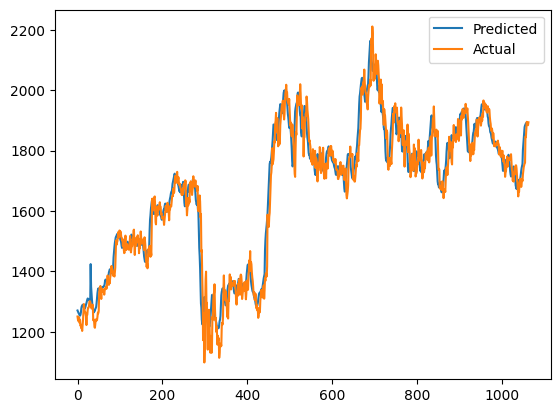

In [ ]:
actual_predictions = [(x * test_std_original['Close']) + test_mean_original['Close'] for x in predictions]
close_prices = test_data_original['Close'].values
plt.plot(actual_predictions, label='Predicted')
plt.plot(close_prices, label='Actual')
plt.legend()
plt.show()

In [ ]:
#need to do


# # Get the last 6 days' closing prices
# last_6_days = close_prices[-6:]

# # Normalize the data using the training mean and standard deviation
# normalized_data = (last_6_days - train_mean_original['Close']) / train_std_original['Close']

# # Convert the data to a PyTorch tensor and move it to the device
# tensor_data = torch.tensor(normalized_data).unsqueeze(0).unsqueeze(2).to(device)

# # Pass the data through the model to get the predicted closing price
# with torch.no_grad():
#     model.eval()
#     output = model(tensor_data)
#     predicted_price = output.squeeze().item() * train_std_original['Close'] + train_mean_original['Close']

# # Print the predicted closing price
# print("Predicted closing price:", predicted_price)